In [2]:
import os

import matplotlib.pyplot as plt
from torchvision import transforms
from generator import *
from discriminator import *
from feature_extractor import *
from trainer import *
from utils import *
from metrics import *
from edgeloss import *
from torch.utils.data import DataLoader
from torchsummary import summary
from dataset import *
import torchio as tio

print(os.getcwd())
torch.cuda.empty_cache()

/mnt/beta/djboonstoppel/Code


In [3]:
%load_ext autoreload
%autoreload 2

data/brain_simulated_t1w_mri/LR/23-Aug-2021_Ernst_labels_100206_3T_T1w_MPR1_img_act_1_contrast_1_Res_2_2_2_img.nii.gz


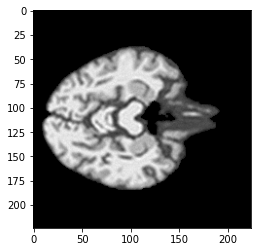

In [25]:
num = 100206
img = ImagePair(number=num, root_dir='data')
img_slice = img.img()['LR'][:,:,25]
plt.imshow(img_slice, cmap='gray')
LRf, HRf = img.LR_HR_fnames()
print(LRf)

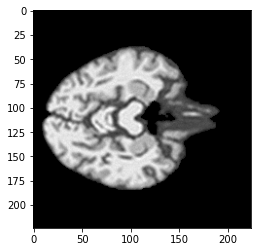

In [26]:
subject_a = tio.Subject(
    lr=tio.ScalarImage(LRf),
    # hr=tio.ScalarImage(HRf),
)
plt.imshow(subject_a['lr'].numpy()[0,:,:,25], cmap='gray')

(1, 224, 224, 69)
0.006133317947387695
2484
(1, 64, 64, 1)


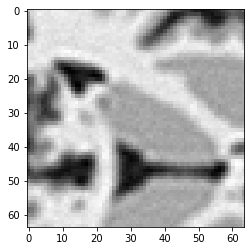

In [52]:
import time

print(subject_a.shape)
start = time.time()
sampler = tio.GridSampler(subject=subject_a, patch_size=(64,64,1), patch_overlap=(32, 32, 0))
end = time.time()
print(end - start)
print(len(sampler))

print(sampler[0]['lr'].numpy().shape)
plt.imshow(np.squeeze(sampler[1000]['lr'].numpy()), cmap='gray')
